# Question 1


In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
tm_train = pd.read_excel('Asssignment4_Data.xlsx',header = 0)
tm_test = pd.read_excel('Asssignment4_Data.xlsx',header = 0, sheet_name='Test')

In [36]:
data_train = tm_train.to_numpy()
data_test = tm_test.to_numpy()
# print(data_train)
# print(data_test)

## Question 1.1

Conditional probability distribution

In [37]:
# Prior probability
numApt=tm_train[tm_train['Construction type']=='Apartment'].shape[0]
numHouse=tm_train[tm_train['Construction type']=='House'].shape[0]
numCon=tm_train[tm_train['Construction type']=='Condo'].shape[0]

aptPrior = numApt/(numApt+numHouse+numCon)
housePrior = numHouse/(numApt+numHouse+numCon)
conPrior = numCon/(numApt+numHouse+numCon)

print(aptPrior, housePrior, conPrior)

0.35 0.35 0.3


### For categorical features

We can use $\hat P(X_j = a_{jk}|C=c_i)$ to calculate the conditional probabilities. Here, Bathrooms, Garages, Rooms, Bedrooms are categoricial features.

For example, for the bathrooms, the conditional probabilities are calculated as follows:
\begin{align}
\hat P(X_j=1|C=Apt) = \frac{\hbox{number of Apt with 1 bathroom}}{\hbox{number of Apt}}=\frac{5}{7}\\
\hat P(X_j=1.5|C=Apt) = \frac{\hbox{number of Apt with 1.5 bathroom}}{\hbox{number of Apt}}=\frac{1}{7}\\
\hat P(X_j=2.5|C=Apt) = \frac{\hbox{number of Apt with 2.5 bathroom}}{\hbox{number of Apt}}=\frac{1}{7}\\
\hat P(X_j=1|C=House) = \frac{\hbox{number of House with 1 bathroom}}{\hbox{number of House}}=\frac{6}{7}\\
\hat P(X_j=1.5|C=House) = \frac{\hbox{number of House with 1.5 bathroom}}{\hbox{number of House}}=\frac{1}{7}\\
\hat P(X_j=2.5|C=House) = \frac{\hbox{number of House with 2.5 bathroom}}{\hbox{number of House}}=0\\
\hat P(X_j=1|C=Condo) = \frac{\hbox{number of Condo with 1 bathroom}}{\hbox{number of Condo}}=\frac{4}{6}\\
\hat P(X_j=1.5|C=Condo) = \frac{\hbox{number of Condo with 1.5 bathroom}}{\hbox{number of Condo}}=\frac{1}{6}\\
\hat P(X_j=2.5|C=Condo) = \frac{\hbox{number of Condo with 2.5 bathroom}}{\hbox{number of Condo}}=\frac{1}{6}\\
\end{align}

### For continuous features

We need to use 
$$\hat P(X_j|C=c_i)=\frac{1}{\sqrt{2 \pi}σ_{ji}}\exp(-\frac{(X_j-μ_{ji})^2}{2σ_{ij}^2})$$
for the conditional probabilities.

The Local Price, Land Area, Living area, Age of home are continuous features.

Here, we take the local price as example. The mean of local price in Apartments is 7.33 and the variance is 11.21. The mean of local price in Houses is 5.76 and the variance is 0.28. The mean of local price in Condo is 7.42 and the variance is 17.72.  

In the following table, the conditional probabilities for each feature are shown:



If the picture can not loaded properly, please view the attached image file.
![title](Conditional_Probabilities.png)

## Question 1.2


In [38]:
# data pre-process
tm_apt = tm_train[df_train['Construction type']=='Apartment']
tm_house = tm_train[df_train['Construction type']=='House']
tm_condo = tm_train[df_train['Construction type']=='Condo']

apt_train = tm_apt.to_numpy()[:,1:9]
house_train = tm_house.to_numpy()[:,1:9]
condo_train = tm_condo.to_numpy()[:,1:9]

In [39]:
# Hard-code the predict function
def prediction(x, m=1):
  Prob_conditional = np.zeros((3,8))
  #Apt
  # continuous feature
  for j in range(8):
    if j == 0 or j == 2 or j == 3 or j == 7:
      mean = np.mean(apt_train[:,j])
      std = np.std(apt_train[:,j])
      # print(mean,std)
      Prob_conditional[0][j] = stats.norm(mean, std).pdf(x[j])
  
  # categorical feature
  #feature 2
  t = 3
  p = 1/t
  n = 7
  if x[1] == 1:
    nc = 5      
  elif x[1] == 1.5 or x[1] ==2.5:
    nc = 1
  else:
    nc = 0
  p = (nc+m*p)/(n+m)
  Prob_conditional[0][1] =  p
  #feature 5
  t = 4
  p = 1/t
  if x[4] == 0 or x[4] == 1.5:
    nc = 1
  elif x[4] == 1:
    nc = 3
  elif x[4] == 2:
    nc = 2
  else:
    nc = 0
  p = (nc+m*p)/(n+m)  
  Prob_conditional[0][4] =  p
  #feature 6
  t = 4
  p = 1/t
  if x[5] == 5 or x[5] == 8 or x[5] == 9:
    nc = 1
  elif x[5] == 6 or x[5] == 7:
    nc = 2
  else:
    nc = 0
  p = (nc+m*p)/(n+m)  
  Prob_conditional[0][5] =  p
  #feature 7
  t = 4
  p=1/t
  if x[6] == 2 or x[6] == 5:
    nc = 1
  elif x[6] == 3:
    nc = 3
  elif x[6] == 4:
    nc = 2
  else:
    nc = 0
  p = (nc+m*p)/(n+m)  
  Prob_conditional[0][6] =  p

  # p_apt = p1_apt*p2_apt*p3_apt*p4_apt*p5_apt*p6_apt*p7_apt*p8_apt*apt_prior

  # House
  # continuous feature
  for j in range(0,8):
    if j == 0 or j == 2 or j == 3 or j == 7:
      mean = np.mean(house_train[:,j])
      std = np.std(house_train[:,j])
      # print(mean,std)
      Prob_conditional[1][j] = stats.norm(mean, std).pdf(x[j])
  
  # categorical feature
  #feature 2
  t = 2
  p=1/t
  n = 7
  if x[1] == 1:
    nc = 6      
  elif x[1] == 1.5:
    nc = 1
  else:
    nc = 0
  p = (nc+m*p)/(n+m)
  Prob_conditional[1][1] =  p
  #feature 5
  t = 4
  p=1/t
  if x[4] == 0 or x[4] == 1 or x[4] == 2:
    nc = 2
  elif x[4] == 1.5:
    nc = 1
  else:
    nc = 0
  p = (nc+m*p)/(n+m)  
  Prob_conditional[1][4] =  p
  #feature 6
  t = 3
  p=1/t
  if x[5] == 5:
    nc = 1
  elif x[5] == 6:
    nc =4
  elif x[5] == 7:
    nc = 2
  else:
    nc = 0
  p = (nc+m*p)/(n+m)  
  Prob_conditional[1][5] =  p
  #feature 7
  t = 3
  p=1/t
  if x[6] == 2 or x[6] == 4:
    nc = 1
  elif x[6] == 3:
    nc = 5
  else:
    nc =0
  p = (nc+m*p)/(n+m)  
  Prob_conditional[1][6] =  p


  # condo
  # continuous feature
  for j in range(0,8):
    if j == 0 or j == 2 or j == 3 or j == 7:
      mean = np.mean(condo_train[:,j])
      std = np.std(condo_train[:,j])
      # print(mean,std)
      Prob_conditional[2][j] = stats.norm(mean, std).pdf(x[j])
  
  # categorical feature
  #feature 2
  t = 3
  p=1/t
  n = 6
  if x[1] == 1:
    nc = 4
  elif x[1] == 2.5 or x[1] == 1.5:
    nc = 1 
  else:
    nc = 0
  p = (nc+m*p)/(n+m)
  Prob_conditional[2][1] =  p
  #feature 5
  t = 2
  p=1/t
  if x[4] == 2:
    nc = 2
  elif x[4] == 1:
    nc = 4
  else:
    nc = 0
  p = (nc+m*p)/(n+m)  
  Prob_conditional[2][4] =  p
  #feature 6
  t = 3
  p=1/t
  if x[5] == 6:
    nc = 4
  elif x[5] == 7 or x[5] == 10: 
    nc = 1
  else:
    nc = 0
  p = (nc+m*p)/(n+m)  
  Prob_conditional[2][5] =  p
  #feature 7
  t = 2
  p=1/t
  if x[6] == 3:
    nc = 5
  elif x[6] == 5:
    nc = 1
  else:
    nc = 0
  p = (nc+m*p)/(n+m)  
  Prob_conditional[2][6] =  p
  return Prob_conditional

In [40]:
# This function gives the prediction based on the maximum of probabilities.
def final_class(x):
  index = np.argmax(x)
  # print(index)
  if index == 0:
    print('It is apartment')
  elif index == 1:
    print('It is house')
  else:
    print('It is condo')
  return

In [41]:
data_test = tm_test.to_numpy()[:,1:9]
prior = np.array([aptPrior, housePrior, conPrior])
# prediction(data_test[0])

In [42]:
# test data 1
prob = np.prod(prediction(data_test[0]), axis=1)*prior
print("This is the 1st test example:")
print(prob)
final_class(prob)

# test data 2
prob = np.prod(prediction(data_test[1]), axis=1)*prior
print("This is the 2nd test example:")
print(prob)
final_class(prob)

# test data 3
prob = np.prod(prediction(data_test[2]), axis=1)*prior
print("This is the 3rd test example:")
print(prob)
final_class(prob)

# test data 4
prob = np.prod(prediction(data_test[3]), axis=1)*prior
print("This is the 4th test example:")
print(prob)
final_class(prob)

# test data 5
prob = np.prod(prediction(data_test[4]), axis=1)*prior
print("This is the 5th test example:")
print(prob)
final_class(prob)

This is the 1st test example:
[6.33212438e-07 1.61340058e-05 3.67427032e-06]
It is house
This is the 2nd test example:
[8.48734410e-08 2.47872907e-13 5.14897186e-09]
It is apartment
This is the 3rd test example:
[5.36321186e-08 1.20356144e-10 2.60286631e-08]
It is apartment
This is the 4th test example:
[6.77977080e-08 6.62229936e-17 1.97791264e-09]
It is apartment
This is the 5th test example:
[1.37038331e-07 1.29422388e-35 8.24660044e-07]
It is condo


# Question 2

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train = data_train[:,1:9]
Y_train = data_train[:,9]

X_test = tm_test.to_numpy()[:,1:9]
Y_test = tm_test.to_numpy()[:,9]

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

# Accuracy on training set
print("The accuracy on the training set is:")
trainAccuracy = clf.score(X_train,Y_train)
print(trainAccuracy)

# Accuracy on testing set
print("The accuracy on the testing set is:")
testAccuracy = clf.score(X_test,Y_test)
print(testAccuracy)



The accuracy on the training set is:
1.0
The accuracy on the testing set is:
0.4


### Question 2.1.a and Qustion 2.1.b

The accuracy on the training set is 1.0, the accuracy on the testing set is 0.4.

In [57]:
# get the depth of current decision tree
print(clf.get_depth())
# check on the accuracy for other depths
for i in range(1,5):
    clf_i = DecisionTreeClassifier(max_depth=i)
    clf_i = clf_i.fit(X_train,Y_train)
    trainAccuracy_i = clf_i.score(X_train,Y_train)
    testAccuracy_i = clf_i.score(X_test,Y_test)
    print("When the depth is {:.0f}, the accuracy on the training set is {:.2f}, the accuracy on the testing set is {:.2f}".format(i,trainAccuracy_i,testAccuracy_i))

5
When the depth is 1, the accuracy on the training set is 0.55, the accuracy on the testing set is 0.40
When the depth is 2, the accuracy on the training set is 0.75, the accuracy on the testing set is 0.80
When the depth is 3, the accuracy on the training set is 0.90, the accuracy on the testing set is 0.40
When the depth is 4, the accuracy on the training set is 0.95, the accuracy on the testing set is 0.40


### Question 2.2

From the results above, we can see there is an improvement for training accuracy with deeper decision tree. But when the depth is 2, the test accuracy is the best. So, the best depth should be 2.

### Question 2.3

Deeper decision tree can cause overfitting.

[Text(0.5, 0.8333333333333334, 'X[7] <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.25, 0.5, 'X[0] <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.5, 'X[0] <= 4.55\ngini = 0.58\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.531\nsamples = 8\nvalue = [5, 2, 1]')]

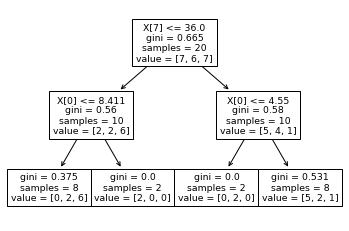

In [60]:
from sklearn.tree import plot_tree
clf_2 = DecisionTreeClassifier(max_depth=2)
clf_2 = clf_2.fit(X_train,Y_train)
plot_tree(clf_2)

### Question 2.4

For the given example, first check the age of home. Age of home is 23, less than 36, so go left. Then, check on the local price. The local price is 9.0384, larger than 8.411, so go right. This cell correspond to Apartment. So, the prediction is 'Apartment'.

In [62]:
a=np.array([9.0384,1,7.8,1.5,1.5,7,3,23])
a = a.reshape(1,a.shape[0])
print("The prediction is {}".format(clf_2.predict(a)))

The prediction is ['Apartment']


# Question 3


## hard-coded K-NN classifier

In [65]:
def KNN(X_train,Y_train,x_test,k):
  #calculate distance of all training sample
  Distance = []
  for i in range(X_train.shape[0]):
    dist = np.linalg.norm(X_train[i]-x_test)
    Distance.append(dist)
  Distance = np.array(Distance)

  #return candidate training sample
  index = np.argpartition(Distance,k)[:k]
  candidate = Y_train[index]

  #calculate highest value
  unique,pos = np.unique(candidate,return_inverse=True) #Finds all unique elements and their positions
  counts = np.bincount(pos)  #Count the number of each unique element
  maxpos = counts.argmax() #Finds the positions of the maximum count
  result = unique[maxpos]
  return result

def accuracy(Y_test, Y_pred):
  count = 0
  for i in range(Y_test.shape[0]):
    if Y_test[i] == Y_pred[i]:
      count+=1
  accuracy = count/Y_test.shape[0]
  return accuracy

n_neighbour = 3
Y_pred = []
for j in range(X_test.shape[0]):
 result = KNN(X_train,Y_train,X_test[j],n_neighbour)
 Y_pred.append(result)
Y_pred

['Apartment', 'Apartment', 'Apartment', 'House', 'House']

## The K-NN classifier from sklearn

In [67]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
neigh.predict(X_test)

array(['Apartment', 'Apartment', 'Apartment', 'House', 'House'],
      dtype=object)

In [79]:
Accuracy = []

for i in range(1,6):
  Y_pred = []
  for j in range(X_test.shape[0]):
    result = KNN(X_train,Y_train,X_test[j],i)
    Y_pred.append(result)
  print(Y_pred)
  Accuracy.append(accuracy(Y_test, Y_pred))
  
print(Accuracy)

['Apartment', 'Apartment', 'Apartment', 'Condo', 'House']
['Apartment', 'Apartment', 'Apartment', 'Condo', 'Condo']
['Apartment', 'Apartment', 'Apartment', 'House', 'House']
['Apartment', 'Apartment', 'Apartment', 'House', 'House']
['Apartment', 'Apartment', 'Apartment', 'House', 'House']
[0.2, 0.2, 0.2, 0.2, 0.2]


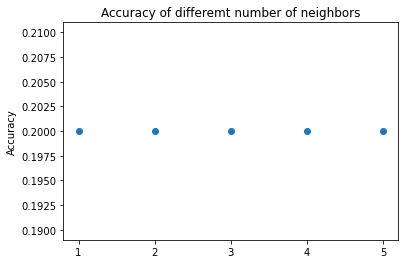

In [78]:
plt.scatter(np.linspace(1,5,5),Accuracy)
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,6))
plt.title("Accuracy for k neighbors")
plt.show()

There is no difference on the accuracy when then number of neighbors varies. The accuracy is 0.2 no matter which k it takes. But the prediction results are different.